# Bank Customer Churn Prediction

In-depth examination of Python-based data science and machine learning libraries is the goal of this project, which aims to anticipate client attrition in the banking industry. Building a solid machine learning model and a cutting-edge visualisation framework are the main goals. By examining a wide range of contributing elements included in the information, the primary goal is to accurately estimate the possibility of customer churn. This effort intends to identify the crucial factors that affect customer churn decisions in the banking industry through the use of sophisticated approaches and the capabilities of these libraries. Incorporating visualisation approaches with predictive modelling results in the development of a powerful tool that empowers educated customer retention decision-making while also promoting a deeper comprehension of the underlying data dynamics.

## Problem Definition

The problem is to anticipate client attrition in the banking industry based on the features present in the dataset.

## Data

The data is taken from the kaggle - https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

## 3. Features

1. customer_id
2. credit_score
3. country
3. gender
4. age
5. tenure
6. balance
7. products_number
8. credit_card
11. active_member
12. estimated_salary
13. churn - 1 if the client has left the bank during some period or 0 if he/she has not.

## Importing necessary libraries

The below code block contains all the libraries that are neccesary to make this project work.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle
import shutil

## Load data

this part consist how to load the dataset to be used.

### Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Bank_Customer_Churn_Prediction/Bank Customer Churn Prediction.csv'
df = pd.read_csv(file_path)
df.shape # (rows, columns)

(10000, 12)

## Iterating over the data

In this section we will iterate or try to understand the data to find any relation the know more about the data.

In [ ]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Getting the discription of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Checking for missing values in the columns of the data

In [ ]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## Visualization of the data

In this section I created visualization to understand our data and check the relation between diffrent features amongst themselves and with the target feature.

### Count of Gender by Churn

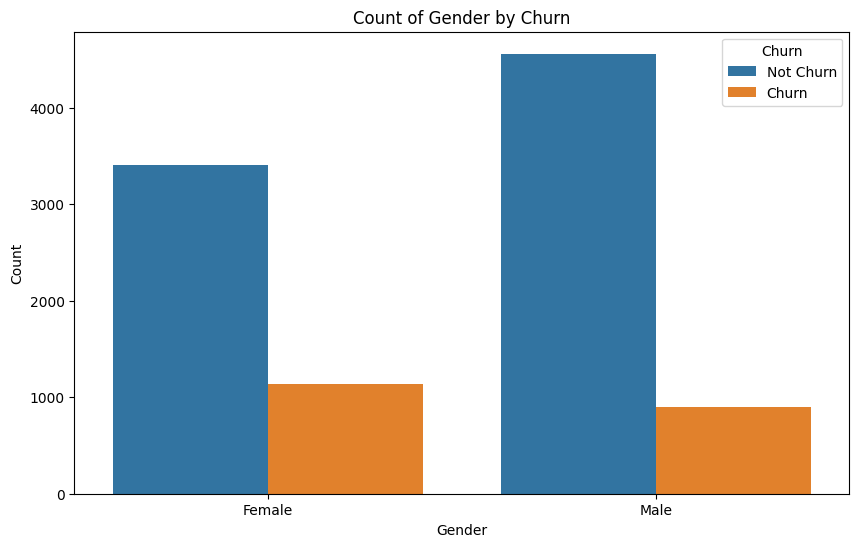

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='churn')
plt.title('Count of Gender by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()

### Distribution of Age by Churn

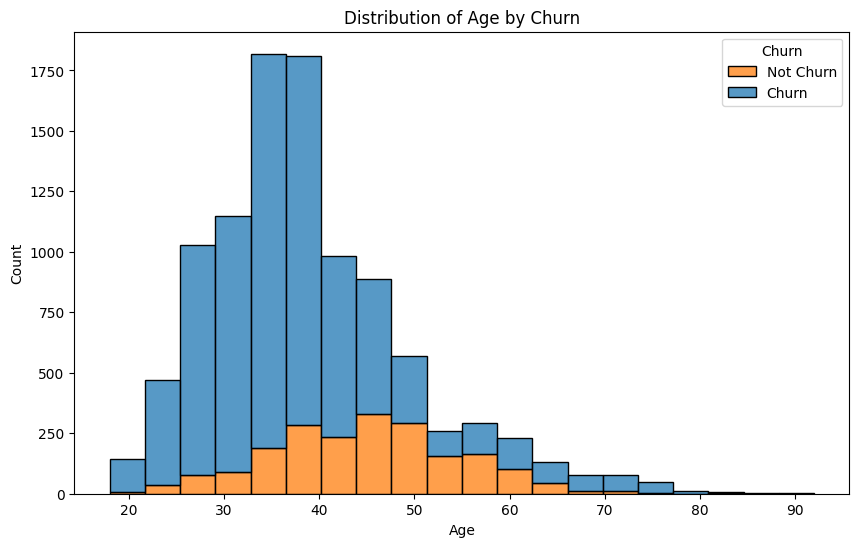

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='churn', multiple='stack', bins=20)
plt.title('Distribution of Age by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()

### Distribution of Credit Score by Churn

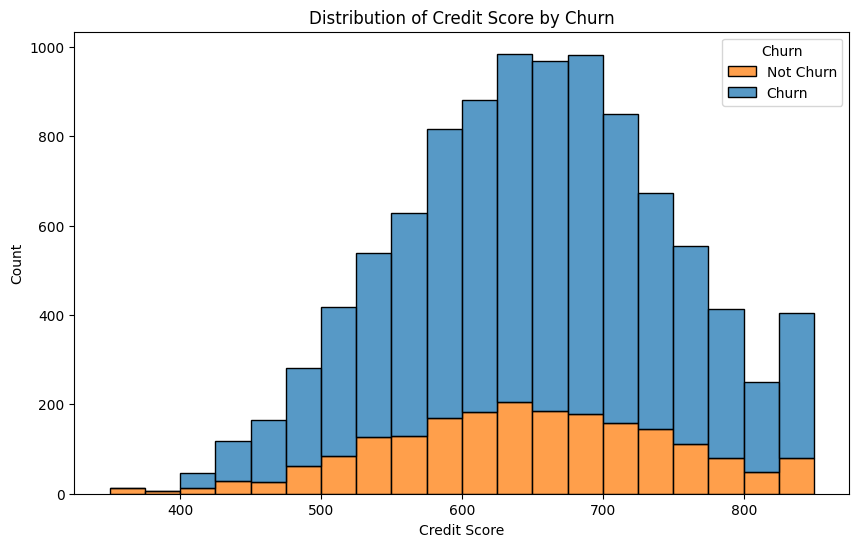

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='credit_score', hue='churn', multiple='stack', bins=20)
plt.title('Distribution of Credit Score by Churn')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()

### Heatmap of Correlation Matrix

<ipython-input-10-deedbfbd3132>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


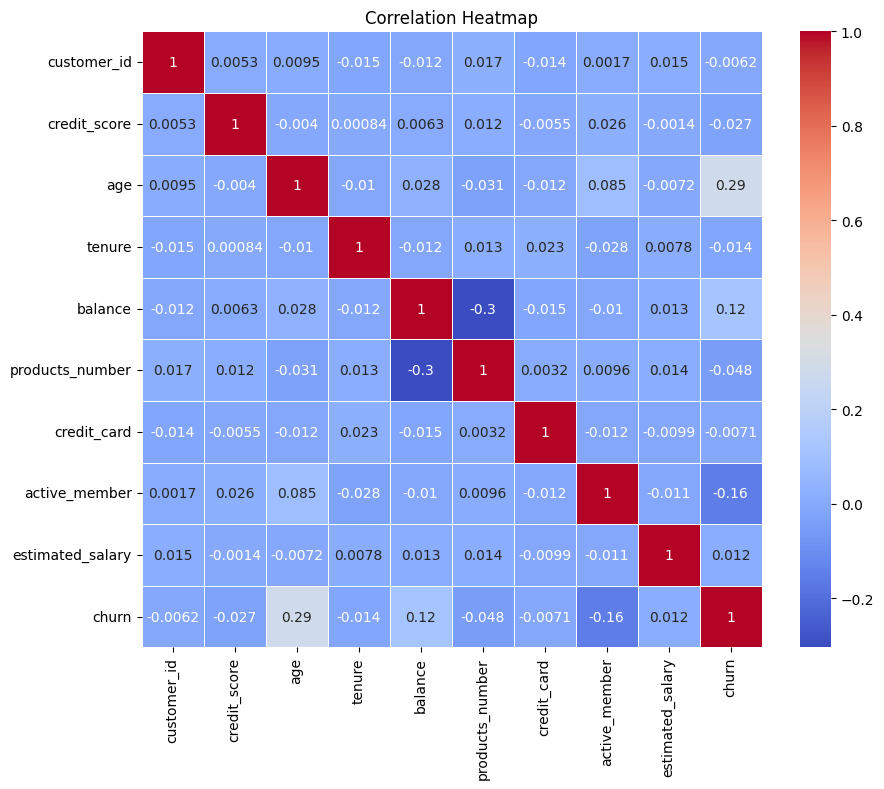

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Count of Churn by Country and Active Member

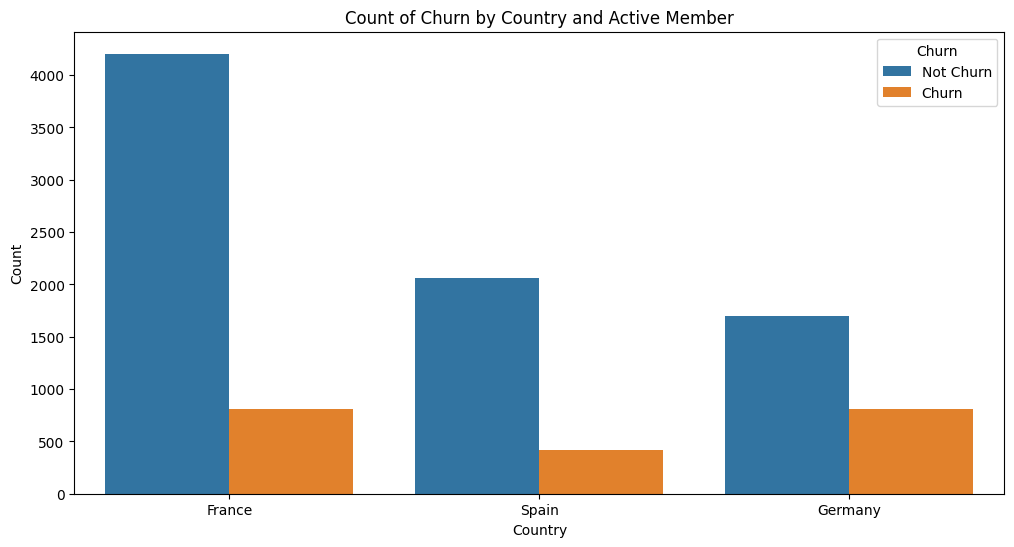

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', hue='churn', dodge=True)
plt.title('Count of Churn by Country and Active Member')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()

### Count of Churn by Number of Products and Active Member

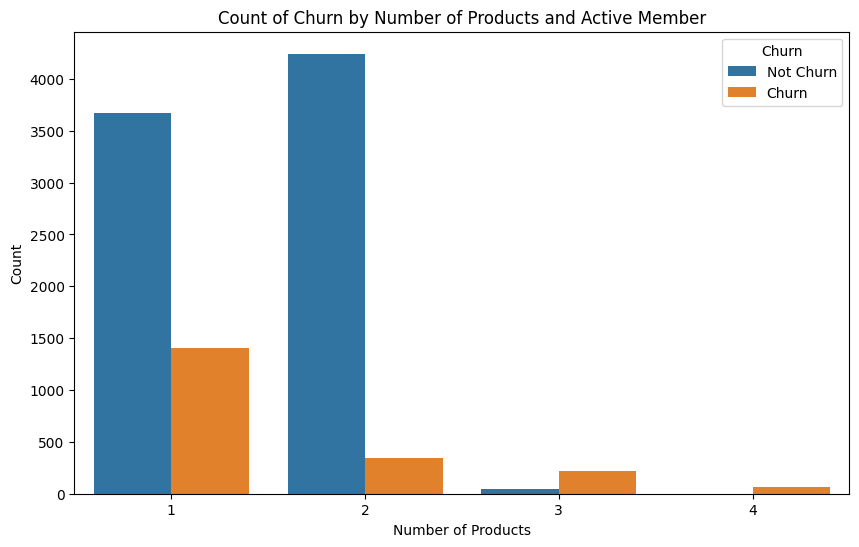

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='products_number', hue='churn', dodge=True)
plt.title('Count of Churn by Number of Products and Active Member')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.show()

### Distribution of Estimated Salary by Gender and Active Member

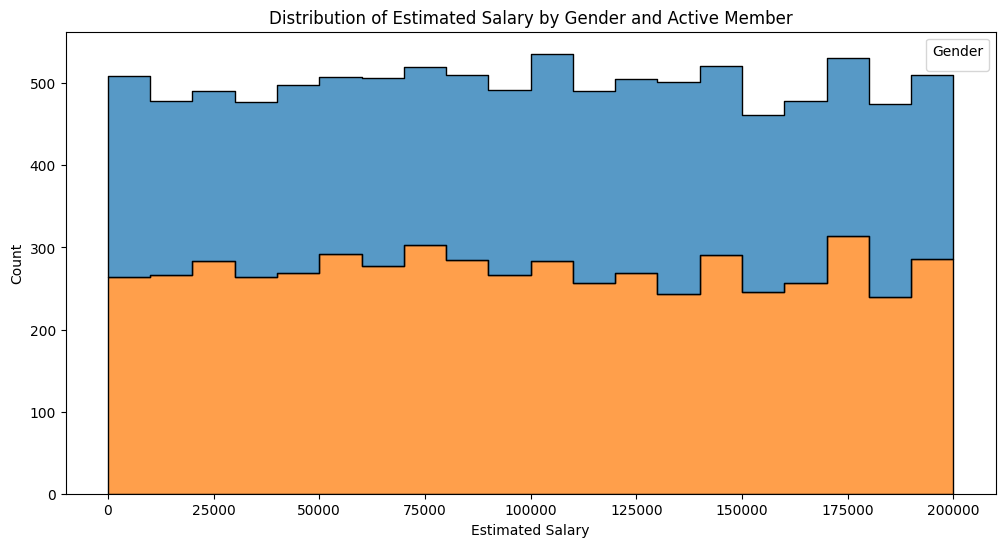

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='estimated_salary', hue='gender', multiple='stack', bins=20, element='step')
plt.title('Distribution of Estimated Salary by Gender and Active Member')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### Count of Churn by Number of Products, Gender, and Active Member

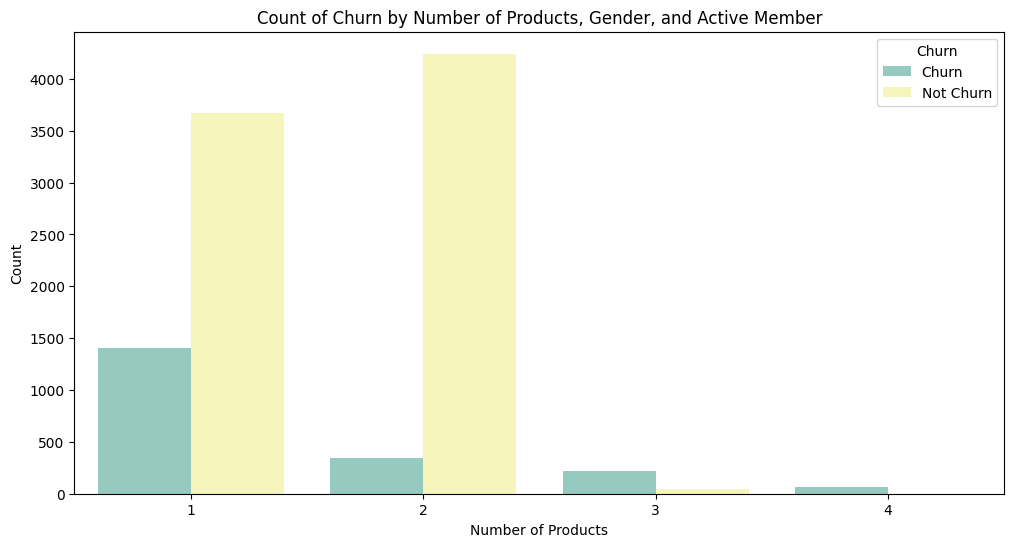

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='products_number', hue='churn', dodge=True, palette='Set3', hue_order=[1, 0])
plt.title('Count of Churn by Number of Products, Gender, and Active Member')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Churn', 'Not Churn'])
plt.show()

## Converting all categorical columns into numerical format

In [ ]:
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
categorical_columns = ['country', 'gender']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the modified dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Making the test and train dataset

In [ ]:
df = df.drop(columns=['customer_id'])
# Split data into X and y
X = df.drop("churn", axis=1)
y = df["churn"]

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

## Using ML Models

In this section we will use diffrent ML models on the dataset and check which Model will give us a higher accuracy and the time taken by the model to run.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

In [ ]:
import time

# Train and evaluate models
# Initialize an empty dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate models
for name, model in models.items():
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)
    end_time = time.time()  # Record end time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy score in the dictionary (multiplied by 100)
    accuracy_scores[name] = accuracy * 100

    training_time = end_time - start_time
    print(f"{name} - Accuracy: {accuracy:.4f} - Training Time: {training_time:.4f} seconds")

Logistic Regression - Accuracy: 0.8005 - Training Time: 0.0946 seconds
Random Forest - Accuracy: 0.8695 - Training Time: 1.2489 seconds
Gradient Boosting - Accuracy: 0.8650 - Training Time: 1.6856 seconds
XGBoost - Accuracy: 0.8545 - Training Time: 1.9290 seconds
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
LightGBM - Accuracy: 0.8675 - Training Time: 0.2555 seconds


## Models Comparison

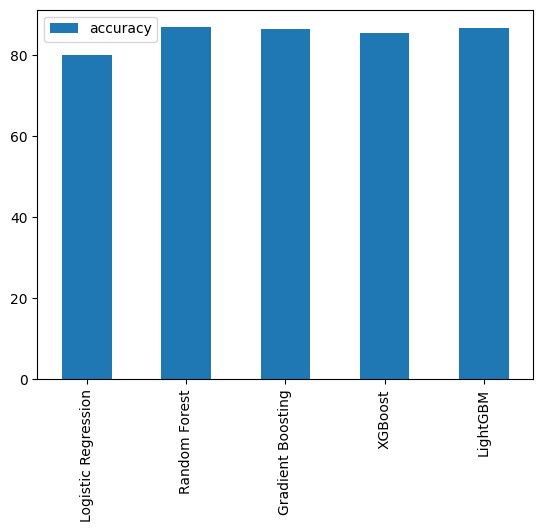

In [ ]:
model_compare = pd.DataFrame(accuracy_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter Tuning

From the above plot you can see thst other than Logistic Regression every other model has a very hight accuracy score of around 88% so now i will try to use Hyperparameter Tuning to increase this accuracy to make our model more accurate

### Hyperparameter tuning on the Random Forest model using RandomizedSearchCV

In [ ]:
# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)

# Perform hyperparameter tuning
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print results
print("RandomizedSearchCV - Hyperparameter Tuning Results:")
print(f"Best Accuracy: {random_search.best_score_:.4f}")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Time Taken: {end_time - start_time:.4f} seconds")

RandomizedSearchCV - Hyperparameter Tuning Results:
Best Accuracy: 0.8621
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Time Taken: 56.8644 seconds


### Hyperparameter tuning on the Gradient Boosting model using RandomizedSearchCV

In [ ]:
# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomizedSearchCV with Gradient Boosting model and parameter grid
random_search_Gradient_boosting = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations
    scoring='accuracy',
    cv=5,  # Cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the randomized search
start_time = time.time()
random_search_Gradient_boosting.fit(X_train, y_train)
end_time = time.time()

# Print the results
print("Randomized Search Results:")
print(f"Best Accuracy: {random_search_Gradient_boosting.best_score_:.4f}")
print("Best Parameters:", random_search_Gradient_boosting.best_params_)
print(f"Time taken for Randomized Search: {end_time - start_time:.4f} seconds")

Randomized Search Results:
Best Accuracy: 0.8642
Best Parameters: {'learning_rate': 0.01, 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 301}
Time taken for Randomized Search: 2109.6069 seconds


### Hyperparameter tuning on the XG Boost using RandomizedSearchCV

In [ ]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': range(100, 1000, 100),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': range(3, 11),
    'min_child_weight': range(1, 11),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_dist,
    scoring='accuracy',
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the RandomizedSearchCV
start_time = time.time()  # Record start time
random_search.fit(X_train, y_train)
end_time = time.time()  # Record end time

# Get the results
best_accuracy = random_search.best_score_
best_params = random_search.best_params_
tuning_time = end_time - start_time

print(f"RandomizedSearchCV - Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")
print(f"Time taken for tuning: {tuning_time:.4f} seconds")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV - Best Accuracy: 0.8636
Best Parameters: {'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}
Time taken for tuning: 768.6145 seconds


### Hyperparameter tuning on the LightGBM using RandomizedSearchCV

In [ ]:
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'num_leaves': [25, 31, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize LightGBM classifier
lgbm = LGBMClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()  # Record start time
random_search.fit(X_train, y_train)
end_time = time.time()  # Record end time

# Get the best accuracy score, best parameters, and total time taken
best_accuracy = random_search.best_score_
best_params = random_search.best_params_
tuning_time = end_time - start_time

print(f"Best Accuracy: {best_accuracy:.4f}")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

print(f"Tuning Time: {tuning_time:.4f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Best Accuracy: 0.8631
Best Parameters:
subsample: 0.8
num_leaves: 31
min_child_samples: 30
max_depth: 15
learning_rate: 0.05
colsample_bytree: 1.0
Tuning Time: 10.4676 seconds


## Results of model after hyperparameter tuning them

1. Random Forest

> Best Accuracy: 0.8615<br>
> Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}<br>
> Time Taken: 57.6084 seconds

2. Gradient Boosting

> Best Accuracy: 0.8650<br>
>Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 558}<br>
>Time taken for Randomized Search: 2117.9838 seconds<br>

3. XG Boost

>Best Accuracy: 0.8625<br>
>Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.001, 'n_estimators': 400, 'min_child_weight': 8, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}<br>
>Time taken for tuning: 821.8873 seconds<br>

4. Light GBM

> Best Accuracy: 0.8631<br>
Best Parameters: {"subsample": 0.8, "num_leaves": 31 "min_child_samples": 30, "max_depth": 15, "learning_rate": 0.05, "colsample_bytree": 1.0}<br>
Time taken for tuning: 9.4179 seconds

## Conclusion

Throughout the Bank Customer Churn Prediction project, I embarked on a journey of rigorous model evaluation and refinement to enhance its predictive capabilities. After meticulous hyperparameter tuning, the outcomes of the models are indeed promising, demonstrating their potential to make robust customer churn predictions.

Out of the models, I found that Gradient Boosting exhibited the highest accuracy, reaching an impressive 86.50% after hyperparameter tuning. This accuracy was achieved through a delicate balance between precision and generalization. The iterative nature of Gradient Boosting, which involves boosting weak learners, contributed to its ability to capture intricate patterns within the data.

While XG Boost and Light GBM also displayed competitive accuracies of 86.25% and 86.31% respectively, I found that Gradient Boosting offered the best trade-off between accuracy and computational efficiency. Despite being slightly behind in terms of accuracy at 86.15%, Random Forest remained a credible contender in the model selection.

To further optimize the model's performance, I considered techniques such as feature selection, dimensionality reduction, and ensemble methods. Additionally, the potential for gathering more diverse and relevant data could greatly enhance the model's predictive power. Addressing dataset imbalance and refining feature engineering could also contribute to improved results.

In conclusion, this project exemplified the iterative process of refining machine learning models. The outcomes underscore the potential of Gradient Boosting in predicting bank customer churn. As the banking industry evolves, the insights I've gained from this project can provide institutions with a better understanding of customer behavior and guide them in making informed business decisions.

## Saving my model

from the above Result seaction we can see that LightGBM has the best accuracy and the time taken is also less. So we will save that model now.

In [ ]:
# Save the best model to a file using pickle
best_model = random_search_Gradient_boosting.best_estimator_
model_filename = 'Bank_Customer_Churn_Prediction.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Move the saved model file to the specified Google Drive folder
model_save_path = '/content/drive/MyDrive/Bank_Customer_Churn_Prediction/' + model_filename
shutil.move(model_filename, model_save_path)

'/content/drive/MyDrive/Bank_Customer_Churn_Prediction/Bank_Customer_Churn_Prediction.pkl'

## Load the Model

This phase loads the model, which I then employ to generate predictions.

In [ ]:
# Load the saved model from Google Drive folder
model_path = '/content/drive/MyDrive/Bank_Customer_Churn_Prediction/Bank_Customer_Churn_Prediction.pkl'
with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load a new data point for prediction (replace with your own data)
new_data = pd.DataFrame({
    'credit_score': [650],
    'country': [1],
    'gender': [0],
    'age': [40],
    'tenure': [5],
    'balance': [150000],
    'products_number': [3],
    'credit_card': [1],
    'active_member': [1],
    'estimated_salary': [120000]
})

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data)

# Print the predictions
for prediction in predictions:
    if prediction == 1:
        print("Client has left the bank")
    else:
        print("Client has not left the bank")


Client has left the bank
